# Car Price Prediction With Machine Learning

### Problem Statement

<p> The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. The dataset has 205 entries with 26 columns. The source data was obtained from <a href='https://www.canva.com/link?target=https%3A%2F%2Fraw.githubusercontent.com%2Famankharwal%2FWebsite-data%2Fmaster%2FCarPrice.csv&design=DAFSZMvBiCI&accessRole=viewer&linkSource=document'>Kaggle</a>. This project will use the features of the cars to build a machine learning model that can predict the price of a car.</p>

The libraries used for this car price prediction with machine learning include;
<ul>
    <li>numpy - for numerical operations</li>
    <li>pandas - for data analysis</li>
    <li>matplotlib/seaborn - for plotting and data visualization</li>
    <li>scikitlearn - for machine learning modeling and evaluation</li>
 </ul>

In [1]:
# import all the tools that will be needed

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
# To visualize the plottings inside the notebook
%matplotlib inline 

# Label encoding
from sklearn.preprocessing import LabelEncoder

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model Evaluators
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
# Load the data
cars = pd.read_csv("CarPrice.csv", index_col='car_ID')
cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Since the index column was replaced with "car_ID" column, the number of columns in the dataset has been reduced from 26 to 25.

In [3]:
# Rows and columns
cars.shape

(205, 25)

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [5]:
#checking for missing data
cars.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
# number of unique features
cars.select_dtypes(include='object').nunique()

CarName           147
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
enginetype          7
cylindernumber      7
fuelsystem          8
dtype: int64

In [7]:
cars.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


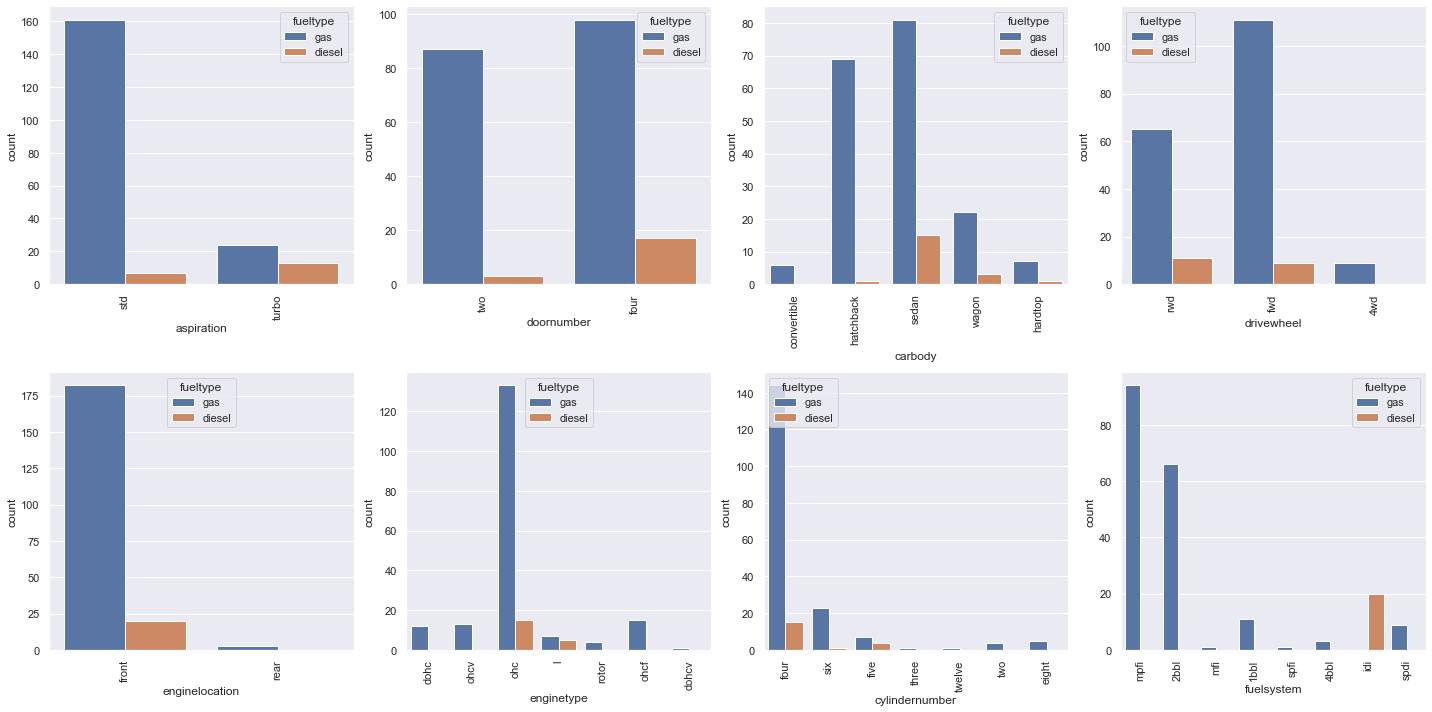

In [8]:
car_feature = ['aspiration', 'doornumber', 'carbody', 'drivewheel', 
               'enginelocation', 'enginetype', 'cylindernumber','fuelsystem']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
axs = axs.flatten()

# create barplot for each categorical features
for i, var in enumerate(car_feature):
    sns.countplot(x=var, hue='fueltype', data=cars, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

fig.tight_layout()
plt.show()

In [9]:
for i in car_feature:
    print(f"{i}: {cars[i].unique()}")

aspiration: ['std' 'turbo']
doornumber: ['two' 'four']
carbody: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel: ['rwd' 'fwd' '4wd']
enginelocation: ['front' 'rear']
enginetype: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [10]:
cars.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


(15.5, -0.5)

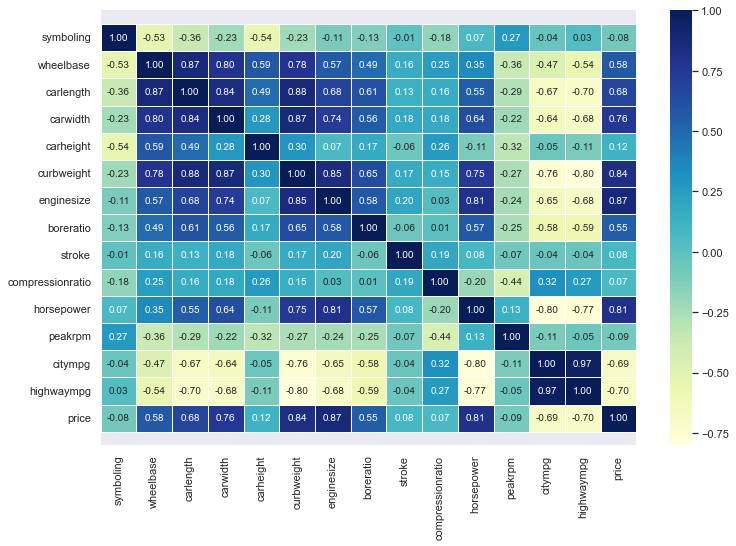

In [11]:
# visualizing the correlation matrix
corr_matrix = cars.corr()
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(corr_matrix, 
                 annot=True, 
                 linewidths=0.5, 
                 fmt='.2f', cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [12]:
# categorical column
cat_col = cars.select_dtypes(include=['object', 'category']).columns
print(cat_col)

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


In [13]:
# numerical column
num_col = [col for col in cars.columns if col not in cat_col]
print(num_col)

['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [14]:
# convert the categorical column to numbers column
le = LabelEncoder()

for i in cat_col:
    cars[i] = le.fit_transform(cars[i])
    print(f"{i}:{cars[i].unique()}")

CarName:[  2   3   1   4   5   9   7   6   8  10  11  12  15  13  14  24  25  26
  35  27  32  34  29  28  30  33  31  39  43  37  38  42  36  41  44  40
  47  45  46  49  48  50  52  51  61  59  58  53  54  60  55  57  56  19
  17  16  22  20  23  18  21  62  65  64  68  63  66  67  69   0  73  81
  76  83  77  74  78  70  79  71  72  80  82  75  85  84  86  88  87  92
  89  93  91  94  90  98  95  97  96  99 100 101 103 102 104 107 106 105
 108 109 110 111 123 120 116 121 117 112 125 115 118 114 119 122 126 127
 124 113 128 129 130 133 137 131 136 132 145 146 134 135 139 138 140 141
 143 144 142]
fueltype:[1 0]
aspiration:[0 1]
doornumber:[1 0]
carbody:[0 2 3 4 1]
drivewheel:[2 1 0]
enginelocation:[0 1]
enginetype:[0 5 3 2 6 4 1]
cylindernumber:[2 3 1 4 5 6 0]
fuelsystem:[5 1 4 0 7 2 3 6]


In [15]:
# Split the data into X and y

X = cars.drop(["price"], axis=1)
y = cars["price"]

In [16]:
X

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,2,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,3,3,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
3,1,1,1,0,1,2,2,0,94.5,171.2,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
4,2,4,1,0,0,3,1,0,99.8,176.6,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
5,2,5,1,0,0,3,0,0,99.4,176.6,...,1,136,5,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,139,1,0,0,3,2,0,109.1,188.8,...,2,141,5,3.78,3.15,9.5,114,5400,23,28
202,-1,138,1,1,0,3,2,0,109.1,188.8,...,2,141,5,3.78,3.15,8.7,160,5300,19,25
203,-1,140,1,0,0,3,2,0,109.1,188.8,...,3,173,5,3.58,2.87,8.8,134,5500,18,23


In [17]:
y

car_ID
1      13495.0
2      16500.0
3      16500.0
4      13950.0
5      17450.0
        ...   
201    16845.0
202    19045.0
203    21485.0
204    22470.0
205    22625.0
Name: price, Length: 205, dtype: float64

In [18]:
# split dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
lg = LinearRegression()
lg.fit(X_train,y_train)
lg.score(X_test,y_test)

0.8407071151499251

In [20]:
# randomise the sample so that each of the fold will have equal number of the sample
validate = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42) 

cross_val_score(LinearRegression(),X,y, cv=validate)

array([0.84070712, 0.90503711, 0.52970592, 0.88526998, 0.89858578])

In [21]:
import warnings
warnings.filterwarnings('ignore')

# create a function using GridSearchCV to find the best model
scores = []
def best_model(X,y):
    algorithms = {
        'linear regression': {
            'model':LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'decision tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'max_depth': [2, 4, 6, 8],
                'min_samples_split': [2,4,6,8],
                'min_samples_leaf': [1, 2, 3, 4],
                'max_features':['auto', 'sqrt','log2'],
                'random_state': [0, 7, 10, 42]
            }
        },
        
        'XGB Regressor': {
            'model': XGBRegressor(),
            'params': {
                'learning_rate': [0.05, 0.10, 0.15],
                'max_depth': [3, 4, 5, 6, 8],
                'min_child_weight': [1, 3, 5, 7],
                'gamma': [0.0, 0.1, 0.2],
                'colsample_bytree': [0.3, 0.4]
               
            }
        },
        
        'Random Forest Regressor': {
            'model': RandomForestRegressor(),
            'params': {
                'max_depth': [3,5,7,9],
                'min_samples_split': [2,5,10],
                'min_samples_leaf': [1,2,4],
                'max_features' : ["sqrt", "auto"]
            }
        },
        
        'Gradient Boosting Regressor': {
            'model': GradientBoostingRegressor(),
            'params': {
                'learning_rate': [0.01, 0.02, 0.03, 0.04],
                'subsample': [0.9, 0.5, 0.2, 0.1],
                'n_estimators': [100, 500, 1000, 1500],
                'max_depth' : [4, 6, 8, 10]
            }
        },
    }
    
    
    validate = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    
    for algo, config in algorithms.items():
        grid = GridSearchCV(config['model'], config['params'], 
                            cv=validate, return_train_score=False, n_jobs = -1)
        grid.fit(X,y)
        scores.append({
            'model': algo,
            'best_score': grid.best_score_,
            'best_params': grid.best_params_
        })
        
    return scores

best_model(X,y)

[{'model': 'linear regression',
  'best_score': 0.8118611819552131,
  'best_params': {'fit_intercept': True}},
 {'model': 'lasso',
  'best_score': 0.8148432329325527,
  'best_params': {'alpha': 2, 'selection': 'random'}},
 {'model': 'decision tree',
  'best_score': 0.906746458053872,
  'best_params': {'max_depth': 8,
   'max_features': 'auto',
   'min_samples_leaf': 1,
   'min_samples_split': 6,
   'random_state': 7}},
 {'model': 'XGB Regressor',
  'best_score': 0.9333784957458564,
  'best_params': {'colsample_bytree': 0.3,
   'gamma': 0.0,
   'learning_rate': 0.1,
   'max_depth': 4,
   'min_child_weight': 1}},
 {'model': 'Random Forest Regressor',
  'best_score': 0.9381495324393356,
  'best_params': {'max_depth': 9,
   'max_features': 'auto',
   'min_samples_leaf': 1,
   'min_samples_split': 2}},
 {'model': 'Gradient Boosting Regressor',
  'best_score': 0.9436842116896882,
  'best_params': {'learning_rate': 0.04,
   'max_depth': 6,
   'n_estimators': 1500,
   'subsample': 0.5}}]

From the GridSearchCV, the <strong>GradientBoostingRegressor</strong> model has the highest best_score, hence it's better than the rest. 

In [22]:
model_compare = pd.DataFrame(scores, columns=['model','best_score','best_params'])
model_compare

,model,best_score,best_params
0,linear regression,0.811861,{'fit_intercept': True}
1,lasso,0.814843,"{'alpha': 2, 'selection': 'random'}"
2,decision tree,0.906746,"{'max_depth': 8, 'max_features': 'auto', 'min_..."
3,XGB Regressor,0.933378,"{'colsample_bytree': 0.3, 'gamma': 0.0, 'learn..."
4,Random Forest Regressor,0.938150,"{'max_depth': 9, 'max_features': 'auto', 'min_..."
5,Gradient Boosting Regressor,0.943684,"{'learning_rate': 0.04, 'max_depth': 6, 'n_est..."


<AxesSubplot:xlabel='best_score', ylabel='model'>

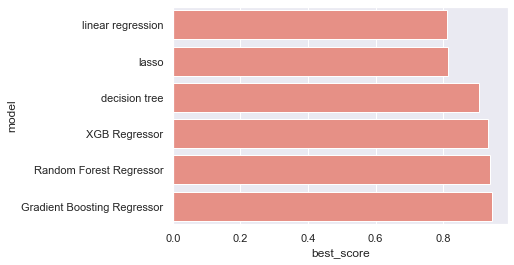

In [23]:
# visualise the different models

sns.barplot(x='best_score', y='model', data=model_compare, 
            color="salmon", saturation=.7)

In [24]:
# using GradientBoost Regressor to train the data

gbr = GradientBoostingRegressor(learning_rate=0.04, max_depth=6, 
                                n_estimators=1500, subsample=0.5)

gbr.fit(X_train,y_train)
gbr.score(X_test,y_test)

0.9363450137916801

In [25]:
# make predictions
predict_price = gbr.predict(X_test)

In [26]:
mse = mean_squared_error(y_test, predict_price)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predict_price)
r2 = r2_score(y_test, predict_price)

print(f'MSE is {mse}')
print(f'RMSE is {rmse}')
print(f'R2 Score is {r2}')
print(f'MAE is {mae}')

MSE is 5025180.5603239285
RMSE is 2241.6914507406964
R2 Score is 0.9363450137916801
MAE is 1572.379861943754


Our model achieves an MAE of 1572.379861943754; this means, on average our models predictions are units away from the actual value. Let's make it a little more visual.

In [27]:
# comparing actual values with predicted values
Prediction = pd.DataFrame(data={"actual values": y_test,
                          "predicted values": predict_price})
Prediction[:10]

,actual values,predicted values
car_ID,,
16,30760.000,33771.359994
10,17859.167,20265.654603
101,9549.000,8751.254599
133,11850.000,12637.962987
69,28248.000,30980.894029
96,7799.000,7061.254229
160,7788.000,8191.132165
163,9258.000,7933.434469
148,10198.000,8663.150190


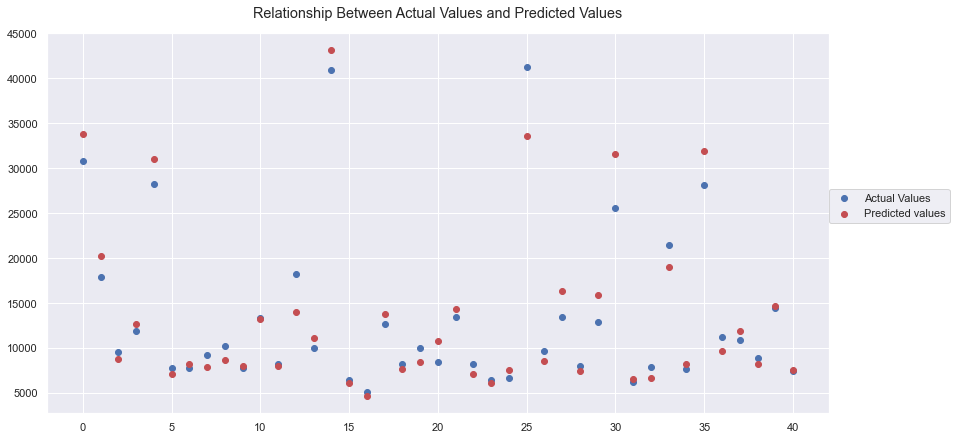

In [28]:
fig, ax = plt.subplots(figsize=(14,7)) 
x = np.arange(0, len(Prediction), 1)
ax.scatter(x, Prediction["actual values"], c='b', label="Actual Values")
ax.scatter(x, Prediction["predicted values"], c='r', label="Predicted values")
ax.text(0.5, 1.05, 'Relationship Between Actual Values and Predicted Values', 
        horizontalalignment='center', verticalalignment='center', 
        transform=ax.transAxes, fontsize='x-large')

ax.legend(loc=(1, 0.5)); 

### Feature Importance

In [29]:
# to know which of the features that has the most importance 
# or affecting the model more in making predictions
gbr.feature_importances_ 

array([1.92154338e-03, 2.26218083e-02, 2.54611170e-04, 2.20255613e-03,
       5.88417413e-04, 6.39833671e-03, 6.27152991e-03, 5.70166628e-05,
       1.91159457e-02, 1.66483494e-02, 7.06924335e-02, 8.27092438e-03,
       1.97872772e-01, 2.33872614e-03, 8.02821923e-04, 5.01634388e-01,
       1.59808802e-03, 6.59128627e-03, 7.63146493e-03, 5.53400966e-03,
       7.07360448e-02, 1.10788784e-02, 8.50785241e-03, 3.06301954e-02])

In [30]:
# creating a function for visualizing the feature importances

def plot_importances(columns, importances, n=20):
    df = (pd.DataFrame({'features': columns,'feature_importances': importances})
           .sort_values('feature_importances', ascending=False).reset_index(drop=False))
    
    # ploting the dataframe
    fig, ax = plt.subplots(figsize=(10,8))
    ax = sns.barplot(x='feature_importances', y='features', data = df[:n], orient='h')
    plt.ylabel('features')
    plt.xlabel('feature_importances')
    plt.title('Feature Importance (GradientBoosting Regressor)', fontsize=16)

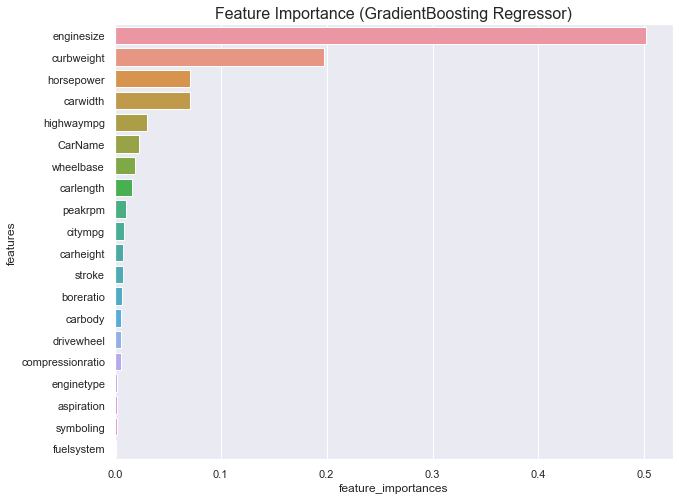

In [31]:
plot_importances(X_train.columns, gbr.feature_importances_)

<p>From the plot above, it is obvious that the <strong>'enginesize'</strong> has the most importance or influence on how the model makes predictions.</p>

In [32]:
# export to a pickle file
import pickle
with open('car_price_model.pickle', 'wb') as f:
    pickle.dump(gbr,f)

In [33]:
# create a json file to store your columns
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))

### Thank You!